c:\Users\Nicolás\miniconda3\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


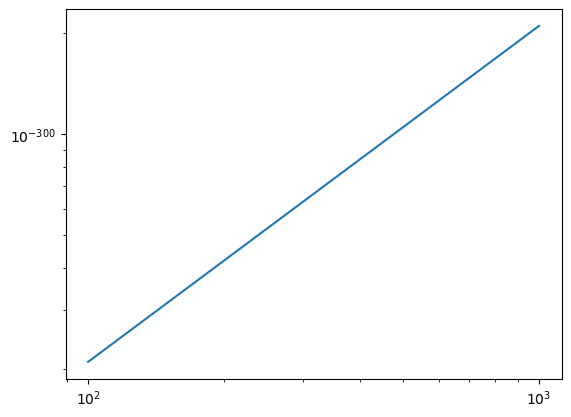

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Mp=1.22E19

DensityFactor = 1.5E8 # Product of s0/rho_c h^2

def sigmaV_to_ZZ_Approx(g, m):
    return g**4/(16*np.pi*m**2)



def gs_to_half(T):
    a, b, c = 10.2, 2.349, 0.252
    return a/(1 + np.exp( -b*(T - c)))

def Yeq(x):
    return 0.145*x**1.5*np.exp(-x)

X =np.logspace(np.log10(1),np.log10(100), int(1e4))

def dYdx(Y, x, σv, m, Mp):
    return - np.sqrt(np.pi/45)* Mp * m * σv * gs_to_half(m/x)/x**2 * (Y**2-Yeq(x)**2) 

def Y(x, m, σv, Mp):
    
    return odeint(dYdx, Yeq(x[0]), x, args=(σv, m, Mp), mxstep=100)

def Yinf(m, σv, Mp):
    return Y(X, m, σv, Mp)[-1,0]

def RelicDensity(m, σv, Mp):
    return DensityFactor*Yinf(m, σv, Mp)*m


mDM_array = np.logspace(2, 3, 100)
σv = 1e-9

RD_array = [RelicDensity(mDM, σv, Mp=Mp) for mDM in mDM_array]
plt.loglog(mDM_array, RD_array)
plt.show()



Assymetric DM

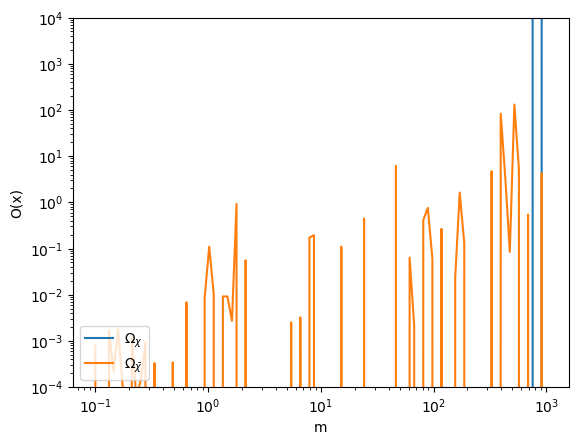

In [3]:
mX = 100
σv = 1e-8

X =np.logspace(np.log10(1),np.log10(30), int(1e6))    

def dYdx(Y, x, σv, m):
    Yp, Ym = Y
    lam = 0.264*Mp*m*σv
    dydx = - lam/x**2 *gs_to_half(m/x) * (Yp*Ym - Yeq(x)**2)
    return [dydx, dydx]

def Boltzmann_equations(x, σv, m):
    Yp0 = 1*Yeq(x[0])
    Ym0 = (Yeq(x[0]) - Yp0)
    Y0 = [Yp0,Ym0]
    return odeint(dYdx, Y0, x, args=(σv, m))



def OmegaChi(x, σv, m):
    Yp = Boltzmann_equations(x, σv, m)[-1, 0]
    return Yp*m*DensityFactor

def OmegaChiBar(x, σv, m):
    Ym = Boltzmann_equations(x, σv, m)[-1, 1]
    return Ym*m*DensityFactor


def OmegaDM(x, σv, m):
    return OmegaChi(x, σv, m) + OmegaChiBar(x, σv, m)

def Plot_Yields(x=X, σv=σv, m=mX):

    Yp = Boltzmann_equations(X, σv, m)[:,0]
    Ym = Boltzmann_equations(X, σv, m)[:,1]
    Ochi = OmegaChi(X, σv, m)
    OchiBar = OmegaChiBar(X, σv, m)

    plt.loglog(X, Yeq(X), 'k--')
    plt.plot(X, Yp, label=r'$\Omega_{{\chi}} = {}$'.format( round(Ochi, 2 )))
    plt.plot(X, Ym, label=r'$\Omega_{{\bar{{\chi}} }} ={}$'.format( round(OchiBar, 2 ) )) 
    plt.xlabel('x')
    plt.ylabel('Y(x)')
    plt.legend(loc=3)
    plt.ylim([1e-10, 1])
    plt.show()



def Plot_Densities(x=X,  σv=σv):

    mDM_array = np.logspace(-1, 3, 100)

    Ochi = [OmegaChi(X,  σv, m) for m in mDM_array]
    OchiBar = [OmegaChiBar(X,  σv, m) for m in mDM_array]

    plt.loglog(mDM_array, Ochi, label=r'$\Omega_{\chi}$')
    plt.loglog(mDM_array, OchiBar, label=r'$\Omega_{\bar{\chi}}$')
    plt.xlabel('m')
    plt.ylabel('O(x)')
    plt.legend(loc=3)
    plt.ylim([1e-4, 1e4])
    plt.show()

Plot_Densities(σv=1e-8)


In [ ]:
mDM_array = np.logspace(-1, 3, 10)

Ochi = [OmegaChi(X,  σv, m) for m in mDM_array]
Ochi

[480082.6855620121,
 1335858.5508763636,
 3717105.794422417,
 10343067.631624905,
 28780199.999218956,
 80082618.4077309,
 222834636.2338112,
 620050613.5425252,
 1725327661.8928194,
 4800827125.958097]

Approx analytical solution

In [ ]:
def xf(m, σ0, etaX): 
    a = 0.145
    lam = 0.264*Mp*m*σ0
    gs = gs_to_half(m/10)
    logterm = np.log( gs* a* lam)**2 / (np.log(gs*a*lam)**4 - gs**2 * lam**2 * (etaX/2)**2 )
    return np.log(gs*a*lam) + 0.5*np.log( logterm )

def Yinf(m, σ0, etaX, sign=1, ): 
    denom = 1 -  (1 - sign*etaX/ )

SyntaxError: invalid syntax (387779617.py, line 9)